# Plot Venn Diagrams between 2 experiments

Experiments
* Handpicked 37 jets (Guo et al. 2022)
* Fontanka (Galitsyna et al., 2023) 
* Fun (Liu et al., 2024) 
* MIA-Jet 

In [1]:
import pandas as pd
import itertools
import pybedtools
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
import bioframe as bf
import numpy as np
import re
from shapely.geometry import LineString, Point
from collections import defaultdict

In [ ]:
    # { # SUCCESSFULLY GENERATED
    #     "hic_file": "/nfs/turbo/umms-minjilab/downloaded_data/Repli-HiC_K562_WT_totalS.ice.mcool",
    #     "data_name": "Repli-HiC_K562_WT_totalS",
    #     "genome": "hg19",
    # },
    # { # SUCCESSFULLY GENERATED
    #     "hic_file": "/nfs/turbo/umms-minjilab/downloaded_data/DP-thymocytes_WT_hic_Guo-2022_GSE199059_mm10-remapped.ice.mcool",
    #     "data_name": "DP-thymocytes_WT_hic_Guo-2022_GSE199059_mm10-remapped",
    #     "genome": "mm10",
    # },
    # { # SUCCESSFULLY GENERATED
    #     "hic_file": "/nfs/turbo/umms-minjilab/downloaded_data/splenic-B-cell_WT_insitu-hic_Kieffer-Kwon-2018_GSE82144_mm9.ice.mcool",
    #     "data_name": "splenic-B-cell_WT_insitu-hic_Kieffer-Kwon-2018_GSE82144_mm9",
    #     "genome": "mm9",
    # },
    # { # SUCCESSFULLY GENERATED
    #     "hic_file": "/nfs/turbo/umms-minjilab/downloaded_data/GSE199059_CD69negDPWTR1R2R3R4_merged.ice.mcool",
    #     "data_name": "GSE199059_CD69negDPWTR1R2R3R4_merged",
    #     "genome": "mm9",
    # },

In [3]:
hic_file = "/nfs/turbo/umms-minjilab/downloaded_data/Repli-HiC_K562_WT_totalS.hic"
data_name = "Repli-HiC_K562_WT_totalS_hg19"

# FUN
f_pred_fun_bedpe = "/nfs/turbo/umms-minjilab/sionkim/jet_pred/FUN_Repli-HiC_K562_WT_totalS_hg19/FUN-pred_50000_1.3.bedpe"
f_pred_fun_tab = "/nfs/turbo/umms-minjilab/sionkim/jet_pred/FUN_Repli-HiC_K562_WT_totalS_hg19/FUN-pred_50000_1.3.tab"

# FONTANKA
f_pred_fontanka = "/nfs/turbo/umms-minjilab/sionkim/jet_pred/FONTANKA_Repli-HiC_K562_WT_totalS.50000.predicted.fountains.tsv"

# MIA-JET
f_pred_miajet_summary = "/nfs/turbo/umms-minjilab/sionkim/miajet_output/Repli-HiC_K562_WT_totalS_chr_combined_50Kb/Repli-HiC_K562_WT_totalS_chr_combined_saliency-90-p-0.1_50Kb_summary_table.csv"
f_pred_miajet_expanded = "/nfs/turbo/umms-minjilab/sionkim/miajet_output/Repli-HiC_K562_WT_totalS_chr_combined_50Kb/Repli-HiC_K562_WT_totalS_chr_combined_saliency-90-p-0.1_50Kb_expanded_table.csv"

genome = "hg19"

In [4]:
fun_bedpe = pd.read_csv(f_pred_fun_bedpe, sep="\t")
fun_table = pd.read_csv(f_pred_fun_tab, sep="\t")
fun_table

,chrom,start,end,name,SoN,strand,perc_res_list,max_extension,signal_noise_upstream,signal_noise_downstream,signal_noise_average_background,p_value
0,chr1,248800000,248850000,.,0.034725,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",350.0,2.764008,14.271486,4.631095,0.031436
1,chr1,245650000,245700000,.,0.016171,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",250.0,2.075779,1.411330,1.680251,0.087024
2,chr1,243350000,243400000,.,0.013129,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",350.0,1.870830,1.113887,1.396376,0.099547
3,chr1,243200000,243250000,.,0.015958,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",500.0,1.416172,1.438078,1.427041,0.056018
4,chr1,242550000,242600000,.,0.021520,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",350.0,2.071704,1.476585,1.724238,0.007859
...,...,...,...,...,...,...,...,...,...,...,...,...
1248,chrX,102350000,102400000,.,0.020841,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",600.0,1.510178,1.810567,1.646786,0.049347
1249,chrX,102450000,102500000,.,0.022493,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",750.0,1.838026,1.943704,1.889389,0.010890
1250,chrX,106400000,106450000,.,0.016214,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",250.0,3.209240,1.192248,1.738599,0.087024
1251,chrX,106800000,106850000,.,0.033477,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1200.0,1.295163,3.166704,1.838422,0.027658


In [5]:
fontanka_table = pd.read_csv(f_pred_fontanka, sep="\t", index_col=0)
fontanka_table.dropna(inplace=True, how="any")
fontanka_table.reset_index(inplace=True, drop=True)
fontanka_table

,chrom,start,end,window_start,window_end,FS,FS_peaks,Scharr,Scharr_box
0,chr1,7150000,7200000,1150000,13200000,0.000021,5.386081e-08,0.110176,481.246887
1,chr1,8050000,8100000,2050000,14100000,0.000011,5.332529e-07,0.238708,1042.675622
2,chr1,8350000,8400000,2350000,14400000,0.000010,1.538013e-07,0.179532,784.197549
3,chr1,9450000,9500000,3450000,15500000,0.000025,6.512002e-06,0.098045,428.259648
4,chr1,9650000,9700000,3650000,15700000,0.000024,2.405624e-07,0.098045,428.259648
...,...,...,...,...,...,...,...,...,...
7153,chrX,149200000,149250000,143200000,155250000,-0.000011,2.123836e-06,0.073896,728.482825
7154,chrY,18550000,18600000,12550000,24600000,-0.000034,6.776264e-21,0.000000,885.667721
7155,chrY,18950000,19000000,12950000,25000000,-0.000035,6.776264e-21,0.000000,885.667721
7156,chrY,19200000,19250000,13200000,25250000,-0.000019,3.747832e-07,0.000000,759.817432


In [6]:
miajet_positions = pd.read_csv(f_pred_miajet_expanded, comment="#")
miajet_table = pd.read_csv(f_pred_miajet_summary, comment="#")
miajet_table

,unique_id,chrom,start,end,length,input_mean,angle_mean,width_mean,jet_saliency,ks,p-val_raw,p-val_corr
0,chr1_25_12,chr1,2.223542e+08,2.240925e+08,2350000,0.215,76.983,6.368,0.263,0.617,0.000,0.000
1,chr1_1071_12,chr1,2.246427e+08,2.251337e+08,800000,0.281,92.141,3.698,0.261,0.688,0.000,0.002
2,chr1_22_18,chr1,1.596501e+08,1.605675e+08,1300000,0.186,87.539,11.781,0.260,0.769,0.000,0.000
3,chr1_70_20,chr1,6.989730e+07,7.081756e+07,1400000,0.243,89.442,24.892,0.230,0.821,0.000,0.000
4,chr1_14_20,chr1,2.463660e+08,2.468952e+08,850000,0.306,90.313,15.746,0.228,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
1752,chrX_13295_1,chrX,1.359620e+08,1.363016e+08,450000,0.411,82.786,2.158,0.147,0.778,0.003,0.011
1753,chrX_1779_9,chrX,9.522445e+06,9.961117e+06,700000,0.387,95.874,4.096,0.145,0.714,0.001,0.004
1754,chrX_1046_0,chrX,9.968278e+07,9.999746e+07,550000,0.170,98.563,1.408,0.139,0.909,0.000,0.001
1755,chrX_284_6,chrX,3.618103e+07,3.671831e+07,850000,0.168,93.617,3.675,0.138,0.647,0.001,0.005


In [7]:
# For a fair comparison of overlaps, we will only consider the common chromosomes
common_chroms = set(fun_table["chrom"].unique()) & set(fontanka_table["chrom"].unique()) & set(miajet_table["chrom"].unique())
common_chroms = list(common_chroms)

miajet_table = miajet_table[miajet_table["chrom"].isin(common_chroms)]
fun_table = fun_table[fun_table["chrom"].isin(common_chroms)]
fontanka_table = fontanka_table[fontanka_table["chrom"].isin(common_chroms)]

print(f"Common chromosomes: {common_chroms}")

Common chromosomes: ['chr9', 'chr5', 'chr21', 'chr2', 'chr11', 'chr7', 'chr16', 'chr19', 'chr15', 'chr14', 'chr3', 'chr13', 'chr18', 'chr10', 'chr1', 'chr8', 'chr4', 'chr6', 'chrX', 'chr22', 'chr20', 'chr12', 'chr17']


# Preprocessing

* Need to have positions for each jet, after which we will run the IOU intersection code from the main program

**Invariants of position table**
* `chrom`
* `x (bp)` : the column axis of the Hi-C matrix
* `y (bp)` : the row axis of the Hi-C matrix
* `unique_id` : the unique identifier linking back to the summary dataframe

### miajet

In [8]:
miajet_positions # this is essentially the output invariant we want to have

,unique_id,chrom,x (bp),y (bp),x (pixels),y (pixels),width,angle_imagej,ridge_strength
0,chr1_3459_8,chr1,2.108860e+08,2.087218e+08,5934.565,53.541,3.919,44.243,0.011
1,chr1_3459_8,chr1,2.109325e+08,2.086999e+08,5934.912,52.573,4.003,57.446,0.011
2,chr1_3459_8,chr1,2.109884e+08,2.086819e+08,5935.447,51.527,1.436,70.582,0.011
3,chr1_3459_8,chr1,2.110090e+08,2.086074e+08,5934.686,50.183,4.785,78.052,0.010
4,chr1_3459_8,chr1,2.110364e+08,2.085588e+08,5934.385,49.107,6.435,81.877,0.009
...,...,...,...,...,...,...,...,...,...
34879,chrX_146_1,chrX,1.407019e+08,1.398306e+08,3967.743,71.824,1.435,81.464,0.036
34880,chrX_9205_3,chrX,9.580091e+07,9.367039e+07,2679.943,54.016,1.538,90.758,0.020
34881,chrX_9205_3,chrX,9.576210e+07,9.370265e+07,2679.851,55.021,1.089,92.334,0.018
34882,chrX_109_9,chrX,4.358364e+07,4.173152e+07,1206.953,57.953,4.610,87.622,0.014


### fun

In [9]:
# midpoint
fun_bedpe["extrusion_x"] = (fun_bedpe["x1"] + fun_bedpe["x2"]) / 2
fun_bedpe["extrusion_y"] = (fun_bedpe["y1"] + fun_bedpe["y2"]) / 2

# extrusion positions define the ending point of the jet 
# the root position of jet is the starting point of the jet, which can be computed from the main table
fun_bedpe

,chr1,x1,x2,chr2,y1,y2,extrusion_x,extrusion_y
0,chr1,248475000,248525000,chr1,249175000,249225000,248500000.0,249200000.0
1,chr1,245425000,245475000,chr1,245925000,245975000,245450000.0,245950000.0
2,chr1,243025000,243075000,chr1,243725000,243775000,243050000.0,243750000.0
3,chr1,242725000,242775000,chr1,243725000,243775000,242750000.0,243750000.0
4,chr1,242225000,242275000,chr1,242925000,242975000,242250000.0,242950000.0
...,...,...,...,...,...,...,...,...
1248,chrX,101775000,101825000,chrX,102975000,103025000,101800000.0,103000000.0
1249,chrX,101725000,101775000,chrX,103225000,103275000,101750000.0,103250000.0
1250,chrX,106175000,106225000,chrX,106675000,106725000,106200000.0,106700000.0
1251,chrX,105625000,105675000,chrX,108025000,108075000,105650000.0,108050000.0


In [10]:
# the main table hosts the "start" and "end" positions, which is the main diagonal start and end
# to get a single point for the jet, we can use the midpoint of the start and end positions
fun_table["root"] = (fun_table["start"] + fun_table["end"]) / 2
# Note that "root" position should technically be "root_x" and "root_y" but since 
# this is a point on the main diagonal, they are the same and we can just use one value

# Lets add a unique identifier now
fun_table["unique_id"] = fun_table.index

fun_table

,chrom,start,end,name,SoN,strand,perc_res_list,max_extension,signal_noise_upstream,signal_noise_downstream,signal_noise_average_background,p_value,root,unique_id
0,chr1,248800000,248850000,.,0.034725,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",350.0,2.764008,14.271486,4.631095,0.031436,248825000.0,0
1,chr1,245650000,245700000,.,0.016171,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",250.0,2.075779,1.411330,1.680251,0.087024,245675000.0,1
2,chr1,243350000,243400000,.,0.013129,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",350.0,1.870830,1.113887,1.396376,0.099547,243375000.0,2
3,chr1,243200000,243250000,.,0.015958,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",500.0,1.416172,1.438078,1.427041,0.056018,243225000.0,3
4,chr1,242550000,242600000,.,0.021520,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",350.0,2.071704,1.476585,1.724238,0.007859,242575000.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,chrX,102350000,102400000,.,0.020841,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",600.0,1.510178,1.810567,1.646786,0.049347,102375000.0,1248
1249,chrX,102450000,102500000,.,0.022493,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",750.0,1.838026,1.943704,1.889389,0.010890,102475000.0,1249
1250,chrX,106400000,106450000,.,0.016214,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",250.0,3.209240,1.192248,1.738599,0.087024,106425000.0,1250
1251,chrX,106800000,106850000,.,0.033477,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1200.0,1.295163,3.166704,1.838422,0.027658,106825000.0,1251


In [11]:
# Lets combine them
fun_minimal = fun_bedpe.copy()

fun_minimal["root"] = fun_table["root"]

# Lets add a unique identifier now
fun_minimal["unique_id"] = fun_minimal.index
fun_minimal["chrom"] = fun_table["chrom"]

fun_minimal = fun_minimal[["unique_id", "chrom", "root", "extrusion_x", "extrusion_y"]]

fun_minimal

,unique_id,chrom,root,extrusion_x,extrusion_y
0,0,chr1,248825000.0,248500000.0,249200000.0
1,1,chr1,245675000.0,245450000.0,245950000.0
2,2,chr1,243375000.0,243050000.0,243750000.0
3,3,chr1,243225000.0,242750000.0,243750000.0
4,4,chr1,242575000.0,242250000.0,242950000.0
...,...,...,...,...,...
1248,1248,chrX,102375000.0,101800000.0,103000000.0
1249,1249,chrX,102475000.0,101750000.0,103250000.0
1250,1250,chrX,106425000.0,106200000.0,106700000.0
1251,1251,chrX,106825000.0,105650000.0,108050000.0


In [12]:
from shapely.geometry import MultiPoint

# Should be the resolution of the miajet program
# This should be standardized across all methods
# This parameter is used to define the sampling frequency of the jet lines 
resolution = 50000 # 50Kb resolution

In [13]:
def generate_positions(df, resolution):
    """
    For each row in df:
      1. Build p1=(extrusion_x, extrusion_y) and p2=(root, root)
      2. Compute the convex hull (a LineString) between p1 and p2
      3. Measure its length, decide how many points to sample (at least 2)
      4. Interpolate that many evenly spaced points along the hull
      5. Emit one row per interpolated point with columns: unique_id, x (bp), y (bp)
    """
    rows = []

    for _, row in df.iterrows():
        # define extrusion point of jet
        p1 = (row["extrusion_x"], row["extrusion_y"]) 
        # define root point of jet (on main diagonal)
        p2 = (row["root"], row["root"])

        # construct convex hull between poitns
        hull = MultiPoint([p1, p2]).convex_hull  
        
        # compute the number of points to sample along the hull
        # this is dependent on the resolution
        distance = hull.length        
        num_points = np.ceil(distance / resolution).astype(int)
        num_points = max(num_points, 2)  # Ensure at least two points
        
        # extract coordinates
        alpha = np.linspace(0, 1, num_points)
        coords = [hull.interpolate(a, normalized=True).coords[0] for a in alpha]
        
        for x_bp, y_bp in coords:
            rows.append({
                "unique_id": row["unique_id"],
                "chrom": row["chrom"],
                "x (bp)":    x_bp,
                "y (bp)":    y_bp
            })

    return pd.DataFrame.from_records(rows)

In [14]:
fun_positions = generate_positions(fun_minimal, resolution)
fun_positions["unique_id"] = fun_positions["unique_id"].astype(int)

In [15]:
fun_positions # done

,unique_id,chrom,x (bp),y (bp)
0,0,chr1,2.485000e+08,2.492000e+08
1,0,chr1,2.485361e+08,2.491583e+08
2,0,chr1,2.485722e+08,2.491167e+08
3,0,chr1,2.486083e+08,2.490750e+08
4,0,chr1,2.486444e+08,2.490333e+08
...,...,...,...,...
25383,1252,chrX,1.068393e+08,1.071250e+08
25384,1252,chrX,1.068732e+08,1.070875e+08
25385,1252,chrX,1.069071e+08,1.070500e+08
25386,1252,chrX,1.069411e+08,1.070125e+08


### fontanka

In [16]:
fontanka_table

,chrom,start,end,window_start,window_end,FS,FS_peaks,Scharr,Scharr_box
0,chr1,7150000,7200000,1150000,13200000,0.000021,5.386081e-08,0.110176,481.246887
1,chr1,8050000,8100000,2050000,14100000,0.000011,5.332529e-07,0.238708,1042.675622
2,chr1,8350000,8400000,2350000,14400000,0.000010,1.538013e-07,0.179532,784.197549
3,chr1,9450000,9500000,3450000,15500000,0.000025,6.512002e-06,0.098045,428.259648
4,chr1,9650000,9700000,3650000,15700000,0.000024,2.405624e-07,0.098045,428.259648
...,...,...,...,...,...,...,...,...,...
7149,chrX,148200000,148250000,142200000,154250000,-0.000012,1.625605e-08,0.164455,718.338661
7150,chrX,148300000,148350000,142300000,154350000,-0.000012,3.166744e-07,0.164455,718.338661
7151,chrX,148400000,148450000,142400000,154450000,-0.000012,3.892560e-08,0.164455,718.338661
7152,chrX,148500000,148550000,142500000,154550000,-0.000012,1.019657e-08,0.164455,718.338661


In [17]:
midpoints = (fontanka_table["end"] + fontanka_table["start"]) / 2

In [18]:
np.all(midpoints - fontanka_table["window_start"] == 6025000.0)

True

In [19]:
np.all(midpoints - fontanka_table["window_end"] == -6025000.0)

True

In [20]:
fontanka_table = fontanka_table.reset_index(drop=True)
fontanka_table["root"] = (fontanka_table["end"] + fontanka_table["start"]) / 2
fontanka_table["unique_id"] = fontanka_table.index
fontanka_table["extrusion_x"] = fontanka_table["window_end"]
fontanka_table["extrusion_y"] = fontanka_table["window_start"]

fontanka_table


,chrom,start,end,window_start,window_end,FS,FS_peaks,Scharr,Scharr_box,root,unique_id,extrusion_x,extrusion_y
0,chr1,7150000,7200000,1150000,13200000,0.000021,5.386081e-08,0.110176,481.246887,7175000.0,0,13200000,1150000
1,chr1,8050000,8100000,2050000,14100000,0.000011,5.332529e-07,0.238708,1042.675622,8075000.0,1,14100000,2050000
2,chr1,8350000,8400000,2350000,14400000,0.000010,1.538013e-07,0.179532,784.197549,8375000.0,2,14400000,2350000
3,chr1,9450000,9500000,3450000,15500000,0.000025,6.512002e-06,0.098045,428.259648,9475000.0,3,15500000,3450000
4,chr1,9650000,9700000,3650000,15700000,0.000024,2.405624e-07,0.098045,428.259648,9675000.0,4,15700000,3650000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7149,chrX,148200000,148250000,142200000,154250000,-0.000012,1.625605e-08,0.164455,718.338661,148225000.0,7149,154250000,142200000
7150,chrX,148300000,148350000,142300000,154350000,-0.000012,3.166744e-07,0.164455,718.338661,148325000.0,7150,154350000,142300000
7151,chrX,148400000,148450000,142400000,154450000,-0.000012,3.892560e-08,0.164455,718.338661,148425000.0,7151,154450000,142400000
7152,chrX,148500000,148550000,142500000,154550000,-0.000012,1.019657e-08,0.164455,718.338661,148525000.0,7152,154550000,142500000


In [21]:
# guarantees that the extrusion point is in the upper diagonal
# doesn't matter except for convention but should be standardized for all points
np.all(fontanka_table["extrusion_x"] >= fontanka_table["extrusion_y"])

True

In [22]:
fontanka_minimal = fontanka_table.copy()

fontanka_minimal = fontanka_minimal[["unique_id", "chrom", "root", "extrusion_x", "extrusion_y"]]

fontanka_minimal

,unique_id,chrom,root,extrusion_x,extrusion_y
0,0,chr1,7175000.0,13200000,1150000
1,1,chr1,8075000.0,14100000,2050000
2,2,chr1,8375000.0,14400000,2350000
3,3,chr1,9475000.0,15500000,3450000
4,4,chr1,9675000.0,15700000,3650000
...,...,...,...,...,...
7149,7149,chrX,148225000.0,154250000,142200000
7150,7150,chrX,148325000.0,154350000,142300000
7151,7151,chrX,148425000.0,154450000,142400000
7152,7152,chrX,148525000.0,154550000,142500000


In [23]:
fontanka_positions = generate_positions(fontanka_minimal, resolution)
fontanka_positions["unique_id"] = fontanka_positions["unique_id"].astype(int)

In [24]:
fontanka_positions

,unique_id,chrom,x (bp),y (bp)
0,0,chr1,1.320000e+07,1.150000e+06
1,0,chr1,1.316456e+07,1.185441e+06
2,0,chr1,1.312912e+07,1.220882e+06
3,0,chr1,1.309368e+07,1.256324e+06
4,0,chr1,1.305824e+07,1.291765e+06
...,...,...,...,...
1223329,7153,chrX,1.493668e+08,1.490832e+08
1223330,7153,chrX,1.493313e+08,1.491187e+08
1223331,7153,chrX,1.492959e+08,1.491541e+08
1223332,7153,chrX,1.492604e+08,1.491896e+08


### Summary

In [25]:
miajet_positions

,unique_id,chrom,x (bp),y (bp),x (pixels),y (pixels),width,angle_imagej,ridge_strength
0,chr1_3459_8,chr1,2.108860e+08,2.087218e+08,5934.565,53.541,3.919,44.243,0.011
1,chr1_3459_8,chr1,2.109325e+08,2.086999e+08,5934.912,52.573,4.003,57.446,0.011
2,chr1_3459_8,chr1,2.109884e+08,2.086819e+08,5935.447,51.527,1.436,70.582,0.011
3,chr1_3459_8,chr1,2.110090e+08,2.086074e+08,5934.686,50.183,4.785,78.052,0.010
4,chr1_3459_8,chr1,2.110364e+08,2.085588e+08,5934.385,49.107,6.435,81.877,0.009
...,...,...,...,...,...,...,...,...,...
34879,chrX_146_1,chrX,1.407019e+08,1.398306e+08,3967.743,71.824,1.435,81.464,0.036
34880,chrX_9205_3,chrX,9.580091e+07,9.367039e+07,2679.943,54.016,1.538,90.758,0.020
34881,chrX_9205_3,chrX,9.576210e+07,9.370265e+07,2679.851,55.021,1.089,92.334,0.018
34882,chrX_109_9,chrX,4.358364e+07,4.173152e+07,1206.953,57.953,4.610,87.622,0.014


In [26]:
fontanka_positions

,unique_id,chrom,x (bp),y (bp)
0,0,chr1,1.320000e+07,1.150000e+06
1,0,chr1,1.316456e+07,1.185441e+06
2,0,chr1,1.312912e+07,1.220882e+06
3,0,chr1,1.309368e+07,1.256324e+06
4,0,chr1,1.305824e+07,1.291765e+06
...,...,...,...,...
1223329,7153,chrX,1.493668e+08,1.490832e+08
1223330,7153,chrX,1.493313e+08,1.491187e+08
1223331,7153,chrX,1.492959e+08,1.491541e+08
1223332,7153,chrX,1.492604e+08,1.491896e+08


In [27]:
fun_positions

,unique_id,chrom,x (bp),y (bp)
0,0,chr1,2.485000e+08,2.492000e+08
1,0,chr1,2.485361e+08,2.491583e+08
2,0,chr1,2.485722e+08,2.491167e+08
3,0,chr1,2.486083e+08,2.490750e+08
4,0,chr1,2.486444e+08,2.490333e+08
...,...,...,...,...
25383,1252,chrX,1.068393e+08,1.071250e+08
25384,1252,chrX,1.068732e+08,1.070875e+08
25385,1252,chrX,1.069071e+08,1.070500e+08
25386,1252,chrX,1.069411e+08,1.070125e+08


# Intersection


In [28]:
from tqdm import tqdm

In [29]:
def match_by_iou(dfA: pd.DataFrame, dfB: pd.DataFrame, buffer_radius=1.0, iou_threshold=0.0, verbose=False):
    """
    For each unique_id in dfA, build a buffered geometry from its (x (bp), y (bp)) coords,
    then compare to every unique_id in dfB (also buffered), computing intersection-over-union.
    Record the dfB unique_id with the highest IoU > iou_threshold (and non-empty intersection).

    Parameters
    ----------
    dfA, dfB : pd.DataFrame
        Must have columns ["unique_id", "x (bp)", "y (bp)"].
    buffer_radius : float
        How much to buffer each LineString/Point before computing areas.
    iou_threshold : float
        Only record matches whose IoU exceeds this (default 0.0, i.e. any non-empty overlap).

    Returns
    -------
    List of (unique_id_A, unique_id_B) pairs.
    """
    # Precompute buffered geometries for dfB
    geomsB = dict()
    for uid_b, grp_b in dfB.groupby("unique_id"):
        coords_b = list(zip(grp_b["x (bp)"], grp_b["y (bp)"]))
        if len(coords_b) < 2:
            geom_b = Point(coords_b[0]).buffer(buffer_radius)
        else:
            geom_b = LineString(coords_b).buffer(buffer_radius)
        geomsB[uid_b] = geom_b

    matches = []

    # Now for each unique_id in dfA, find best‐matching unique_id in dfB
    gb = dfA.groupby("unique_id")
    for uid_a, grp_a in tqdm(gb, total=len(gb), disable=not verbose):
        coords_a = list(zip(grp_a["x (bp)"], grp_a["y (bp)"]))
        if len(coords_a) < 2:
            geom_a = Point(coords_a[0]).buffer(buffer_radius)
        else:
            geom_a = LineString(coords_a).buffer(buffer_radius)

        best_iou = 0.0
        best_uid_b = None

        for uid_b, geom_b in geomsB.items():
            inter = geom_a.intersection(geom_b).area
            if inter == 0:
                continue
            union = geom_a.union(geom_b).area
            iou = inter / union if union > 0 else 0.0

            if iou > best_iou:
                best_iou = iou
                best_uid_b = uid_b

        if best_uid_b is not None and best_iou > iou_threshold:
            matches.append((uid_a, best_uid_b, best_iou))

    return matches


In [30]:
from typing import List, Tuple, Hashable
import networkx as nx        

PairT = Tuple[Hashable, Hashable, float]

def unique_pairs(pairs_a2b: List[PairT], pairs_b2a: List[PairT], method="optimal") -> List[Tuple[Hashable, Hashable]]:
    """
    Combine two directed match lists and return a list of (A_ID, B_ID)
    such that no ID appears more than once.  If *use_optimal* is True,
    solve the maximum-weight matching; otherwise use a greedy heuristic
    """

    # put every edge in the same orientation
    edges: List[PairT] = []
    for a, b, w in pairs_a2b:
        edges.append((a, b, w))          
    for b, a, w in pairs_b2a:
        edges.append((a, b, w))          # flip 

    if method == "optimal":
        # max_weight_matching method
        G = nx.Graph()
        for a, b, w in edges:
            G.add_edge(f"a.{a}", f"b.{b}", weight=w)  # add tags "a." and "b." to avoid uid collisions
        matching = nx.algorithms.matching.max_weight_matching(G, maxcardinality=False, weight="weight")
        # nx returns unordered 2-tuples; recover original IDs and orientation
        result = []
        for u, v in matching:
            if u.startswith("a."):      # u is left side
                a_id = u[2:]            # strip "a."
                b_id = v[2:]            # strip "b."
            else:
                a_id = v[2:]
                b_id = u[2:]
            result.append((a_id, b_id))
        return result

    else:
        # Greedy method
        # highest IOU first
        edges.sort(key=lambda t: t[2], # sort by weight i.e. IOU
                   reverse=True)   
        used_a = set()
        used_b = set()
        result = []

        for a, b, w in edges:
            if a not in used_a and b not in used_b:
                result.append((a, b))
                used_a.add(a)
                used_b.add(b)
        return result



**WARNING: need to run the following code separately for each chromosome and combine!**

In [31]:
# Expanded
positions = [
    miajet_positions,
    fun_positions,
    fontanka_positions
]

# Summary
tables = [
    miajet_table,
    fun_table,
    fontanka_table
]

names = [
    "MIA-Jet",
    "Fun",
    "Fontanka"
]

position_dict = dict(zip(names, positions))
table_dict = dict(zip(names, tables))

In [32]:
buffer_radius = 3 * resolution  # 3 bins
iou_threshold = 0  # ANY overlap

In [33]:
results = pd.DataFrame(index=names, columns=names, dtype=int).fillna(0)
unique_identifiers = []
name_pairs = []
# fill main diagonal with the total number of jets from each method
for n in names:
    results.loc[n, n] = len(table_dict[n])

for n1, n2 in itertools.combinations(names, 2):

    print("-" * 20)
    print(f"Comparing {n1} and {n2}...")


    genome_wide_overlap = 0
    identifiers = []

    for chrom in common_chroms:
        # IOU method is per-chromosome so filter each table by chromosome
        t1 = position_dict[n1].loc[position_dict[n1]["chrom"] == chrom]
        t2 = position_dict[n2].loc[position_dict[n2]["chrom"] == chrom]

        s1 = table_dict[n1].loc[table_dict[n1]["chrom"] == chrom]
        s2 = table_dict[n2].loc[table_dict[n2]["chrom"] == chrom]

        pairs12 = match_by_iou(t1, t2, buffer_radius, iou_threshold)
        pairs21 = match_by_iou(t2, t1, buffer_radius, iou_threshold)

        pairs = unique_pairs(pairs12, pairs21, method="optimal")

        print(f"* {chrom}: {len(pairs)} pairs between {n1} ({len(s1)}) and {n2} ({len(s2)})")

        genome_wide_overlap += len(pairs)
        identifiers += pairs # extend the list

    # Update reuslts table
    results.loc[n1, n2] = genome_wide_overlap
    results.loc[n2, n1] = genome_wide_overlap  # symmetric

    unique_identifiers.append(identifiers)
    name_pairs.append((n1, n2))
    
print("Genome-wide overlaps:")
print(results)

--------------------
Comparing MIA-Jet and Fun...
* chr9: 6 pairs between MIA-Jet (66) and Fun (49)
* chr5: 18 pairs between MIA-Jet (118) and Fun (78)
* chr21: 3 pairs between MIA-Jet (21) and Fun (16)
* chr2: 16 pairs between MIA-Jet (148) and Fun (106)
* chr11: 10 pairs between MIA-Jet (82) and Fun (57)
* chr7: 8 pairs between MIA-Jet (97) and Fun (80)
* chr16: 7 pairs between MIA-Jet (46) and Fun (33)
* chr19: 3 pairs between MIA-Jet (32) and Fun (14)
* chr15: 5 pairs between MIA-Jet (48) and Fun (29)
* chr14: 8 pairs between MIA-Jet (56) and Fun (48)
* chr3: 15 pairs between MIA-Jet (119) and Fun (97)
* chr13: 7 pairs between MIA-Jet (63) and Fun (33)
* chr18: 3 pairs between MIA-Jet (47) and Fun (27)
* chr10: 13 pairs between MIA-Jet (78) and Fun (71)
* chr1: 14 pairs between MIA-Jet (141) and Fun (94)
* chr8: 15 pairs between MIA-Jet (93) and Fun (73)
* chr4: 22 pairs between MIA-Jet (121) and Fun (76)
* chr6: 16 pairs between MIA-Jet (106) and Fun (81)
* chrX: 8 pairs between M

In [40]:
def safe_int(x):
    try:
        return int(x)
    except ValueError:
        return x

# vectorize the function (so it applies element-wise)
safe_convert = np.vectorize(safe_int)

# Construct bed dataframes from the unique identifier pairs 
df_intersections = []

for (n1, n2), pairs in zip(name_pairs, unique_identifiers):
    uid1 = np.array(pairs)[:, 0]  # unique identifiers from n1
    uid2 = np.array(pairs)[:, 1]  # unique identifiers from n2

    uid1 = safe_convert(uid1)
    uid2 = safe_convert(uid2)

    df1 = pd.DataFrame({"unique_id" : uid1,})
    df2 = pd.DataFrame({"unique_id" : uid2,})
    
    # Lets do a merge of the summary table and the unique identifiers
    df1 = table_dict[n1].merge(df1, on="unique_id", how="inner", suffixes=("", "_x"))
    df2 = table_dict[n2].merge(df2, on="unique_id", how="inner", suffixes=("", "_y"))

    # We may now use any of df1 or df2 to construct the bed dataframe
    # to plot the aggregate jet positions


    break




In [ ]:
df1

,unique_id,chrom,start,end,length,input_mean,angle_mean,width_mean,jet_saliency,ks,p-val_raw,p-val_corr
0,chr1_6500_5,chr1,2.433851e+08,2.436097e+08,350000,0.580,86.917,2.435,0.186,1.000,0.000,0.002
1,chr1_17802_1,chr1,2.419943e+08,2.421850e+08,300000,0.553,87.594,3.046,0.170,1.000,0.001,0.004
2,chr1_6541_5,chr1,1.126970e+08,1.128758e+08,300000,0.553,86.873,2.693,0.168,1.000,0.001,0.004
3,chr1_5146_6,chr1,5.281203e+06,5.929405e+06,1150000,0.426,97.555,5.780,0.456,1.000,0.000,0.000
4,chr1_8359_4,chr1,7.003176e+07,7.023464e+07,350000,0.572,89.464,1.977,0.153,0.857,0.004,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...
207,chrX_5_11,chrX,1.134289e+08,1.141279e+08,1050000,0.358,87.413,5.608,0.449,0.952,0.000,0.000
208,chrX_34_3,chrX,1.149187e+07,1.170595e+07,450000,0.438,98.786,3.476,0.188,0.889,0.000,0.003
209,chrX_31_1,chrX,1.376389e+07,1.392510e+07,250000,0.550,85.900,2.625,0.096,1.000,0.004,0.011
210,chrX_106_4,chrX,1.049416e+08,1.052263e+08,350000,0.384,81.543,2.628,0.131,0.857,0.004,0.011


In [42]:
df2

,chrom,start,end,name,SoN,strand,perc_res_list,max_extension,signal_noise_upstream,signal_noise_downstream,signal_noise_average_background,p_value,root,unique_id
0,chr1,243200000,243250000,.,0.015958,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",500.0,1.416172,1.438078,1.427041,0.056018,243225000.0,3
1,chr1,241850000,241900000,.,0.028932,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",650.0,1.617073,2.221083,1.871551,0.067803,241875000.0,5
2,chr1,181650000,181700000,.,0.049228,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",750.0,2.716861,2.233689,2.451697,0.004250,181675000.0,20
3,chr1,193000000,193050000,.,0.017088,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",450.0,1.627444,1.428298,1.521382,0.093326,193025000.0,22
4,chr1,165650000,165700000,.,0.035552,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",450.0,2.492833,1.842947,2.119184,0.034998,165675000.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,chrX,13750000,13800000,.,0.018531,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",250.0,1.835284,2.016120,1.921456,0.087024,13775000.0,1215
208,chrX,104800000,104850000,.,0.023913,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1450.0,1.400845,1.695888,1.534311,0.005844,104825000.0,1222
209,chrX,113300000,113350000,.,0.057002,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1100.0,2.224685,3.165981,2.613150,0.000301,113325000.0,1241
210,chrX,113200000,113250000,.,0.053654,.,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",1850.0,1.946485,2.293685,2.105870,0.056865,113225000.0,1242


In [ ]:
# Diagnostic 
# Has some interesting results when the buffer radius is made extremely large... Whats happening?


miajet_positions_chrom = miajet_positions.loc[miajet_positions["chrom"] == common_chroms[0]]
fontanka_positions_chrom = fontanka_positions.loc[fontanka_positions["chrom"] == common_chroms[0]]

for br in [0, 1000, 5000, 50_000, int(50e3), int(50e3) * 3, int(50e3) * 5, 5_000_000, 50_000_000, 500_000_000]:
    pairs_miajet_fontanka = match_by_iou(miajet_positions_chrom, fontanka_positions_chrom, br, 0.0)
    pairs_fontanka_miajet = match_by_iou(fontanka_positions_chrom, miajet_positions_chrom, br, 0.0)

    unique_opt = unique_pairs(pairs_fontanka_miajet, pairs_miajet_fontanka, method="greedy")

    print(f"Buffer radius: {br} gives # unique pairs (greedy): {len(unique_opt)}")

    unique_opt = unique_pairs(pairs_fontanka_miajet, pairs_miajet_fontanka, method="optimal")

    print(f"Buffer radius: {br} gives # unique pairs (optimal): {len(unique_opt)}")


print(f"Number of jets in MIA-Jet table for {common_chroms[0]}: {len(miajet_table.loc[miajet_table['chrom'] == common_chroms[0]])}")
print(f"Number of jets in Fontanka table for {common_chroms[0]}: {len(fontanka_table.loc[fontanka_table['chrom'] == common_chroms[0]])}")

Buffer radius: 0 gives # unique pairs (greedy): 0
Buffer radius: 0 gives # unique pairs (optimal): 0
Buffer radius: 1000 gives # unique pairs (greedy): 4
Buffer radius: 1000 gives # unique pairs (optimal): 4
Buffer radius: 5000 gives # unique pairs (greedy): 5
Buffer radius: 5000 gives # unique pairs (optimal): 5
Buffer radius: 50000 gives # unique pairs (greedy): 12
Buffer radius: 50000 gives # unique pairs (optimal): 12
Buffer radius: 50000 gives # unique pairs (greedy): 12
Buffer radius: 50000 gives # unique pairs (optimal): 12
Buffer radius: 150000 gives # unique pairs (greedy): 14
Buffer radius: 150000 gives # unique pairs (optimal): 15
Buffer radius: 250000 gives # unique pairs (greedy): 15
Buffer radius: 250000 gives # unique pairs (optimal): 16
Buffer radius: 5000000 gives # unique pairs (greedy): 15
Buffer radius: 5000000 gives # unique pairs (optimal): 17
Buffer radius: 50000000 gives # unique pairs (greedy): 16
Buffer radius: 50000000 gives # unique pairs (optimal): 18
Buffe

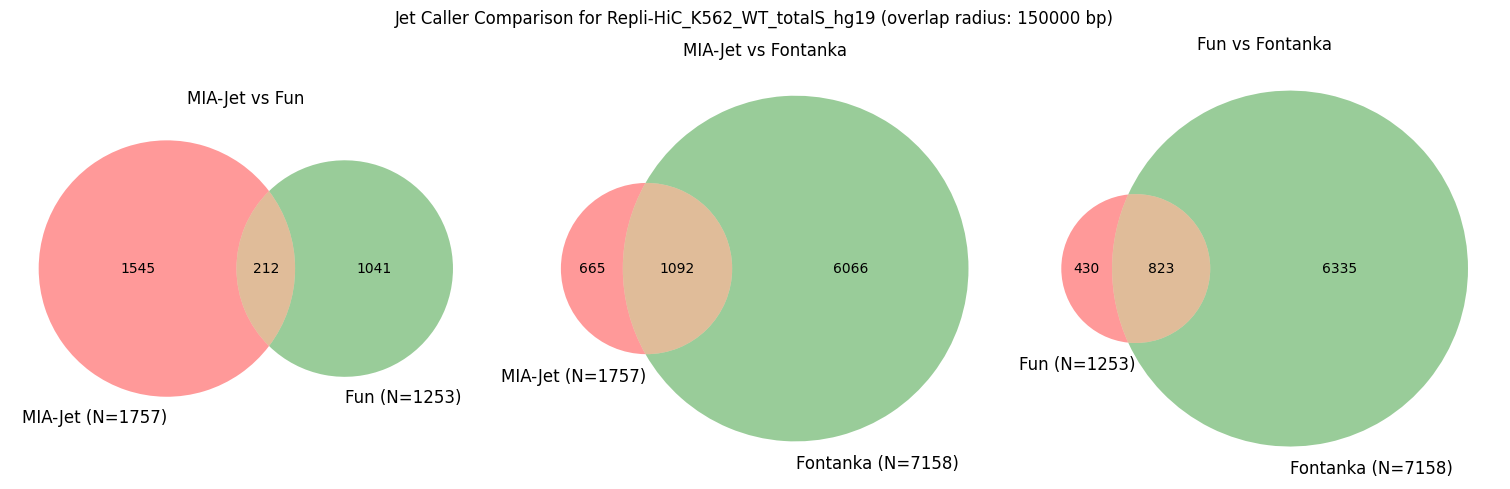

In [89]:
# every pairwise combination of table names
pairs = list(itertools.combinations(names, 2))

fig, axes = plt.subplots(1, len(pairs), figsize=(5 * len(pairs), 5), layout='constrained')

for ax, (A, B) in zip(axes, pairs):
    total_A = results.loc[A, A]
    total_B = results.loc[B, B]
    inter   = results.loc[A, B]  # # of A features shared with B
    
    only_A = total_A - inter
    only_B = total_B - inter

    venn2(subsets=(int(only_A), int(only_B), int(inter)), set_labels=(f"{A} (N={int(total_A)})", f"{B} (N={int(total_B)})"), ax=ax)
    ax.set_title(f"{A} vs {B}")

fig.suptitle(f"Jet Caller Comparison for {data_name} (overlap radius: {int(buffer_radius)} bp)")

plt.show()  


In [7]:
# Define tables
tables = [
    miajet_table,
    fun_table,
    fontanka_table
]

table_names = [
    "MIA-Jet",
    "Fun",
    "Fontanka"
]

table_dict = dict(zip(table_names, tables))

In [22]:
def _chrom_order(chrom):
    """
    Map chr names to an integer order
    """
    m = re.match(r'^chr(\d+)$', chrom)
    if m:
        return int(m.group(1))
    if chrom in ('chrX', 'X'):
        return 23
    if chrom in ('chrY', 'Y'):
        return 24
    if chrom in ('chrM', 'chrMT', 'MT'):
        return 25
    # put everything else at the end
    return float('inf')



bedtools = dict()
for i, t in enumerate(tables):
    df_bed = t.copy()
    df_bed = df_bed[["chrom", "start", "end"]].astype({'start':int,'end':int})
    # df_bed[["start", "end"]] = df_bed[["start", "end"]].astype(int)

    # sort by chromosome
    df_bed["chrom_order"] = df_bed["chrom"].apply(_chrom_order)
    df_bed.sort_values(by=["chrom_order", "start", "end"], inplace=True)
    df_bed.drop(columns=["chrom_order"], inplace=True)
    
    bedtools[table_names[i]] = pybedtools.BedTool.from_dataframe(df_bed)

In [23]:
def count_bedtool_intersect(a_bt, b_bt, w, **kwargs):
    """
    Return the total number of pairwise overlaps between two BedTools objects
    """
    pairs1 = a_bt.intersect(b_bt, wa=True, wb=True, **kwargs)
    pairs2 = b_bt.intersect(a_bt, wa=True, wb=True, **kwargs)

    assert pairs1.count() == pairs2.count(), "Counts are not symmetric"

    df_pairs = pairs1.to_dataframe(names=[
        'chrom_A','start_A','end_A',
        'chrom_B','start_B','end_B',
    ])

    return df_pairs, pairs1.count()


In [42]:
results = pd.DataFrame(index=table_names, columns=table_names, dtype=int).fillna(0)

# fill main diagonal with the total number of jets from each method
for name, df in zip(table_names, tables):
    results.loc[name, name] = len(df)

# Leniency ± window size (bp)
# window_size = int(50e3 * 3)
# window_size = 3000
window_size = int(50e3 * 10000)

# for clamping the leniency slop funcitonality
# chromsizes = bf.fetch_chromsizes(genome)
df_pairs = []

for n1, n2 in itertools.combinations(table_names, 2):
    a_bt = bedtools[n1]
    b_bt = bedtools[n2]

    a_bt_slop = a_bt.slop(b=window_size, genome=genome)
    b_bt_slop = b_bt.slop(b=window_size, genome=genome)

    df_ab = a_bt_slop.intersect(b_bt_slop, 
                                wa=True, # simply whether to add the A and B data to the dataframe output (duh)
                                wb=True, 
                                u=True # essentially, if A matches WITH ANYTHING in B only report it ONCE (as oppposed to being copied multiple times for each overlap)
                                ).to_dataframe(names=["chrom_A", "start_A", "end_A", "chrom_B", "start_B", "end_B"])
    df_ba = b_bt_slop.intersect(a_bt_slop, 
                                wa=True, 
                                wb=True, 
                                u=True
                                ).to_dataframe(names=["chrom_A", "start_A", "end_A", "chrom_B", "start_B", "end_B"])



    break

    # assert count_1 == count_2, "Counts are not symmetric"

    # results.loc[n1, n2] = count_1
    # results.loc[n2, n1] = count_1

    # df_pairs.append(df_ab)

results

,MIA-Jet,Fun,Fontanka
MIA-Jet,1757.0,0.0,0.0
Fun,0.0,1253.0,0.0
Fontanka,0.0,0.0,7154.0


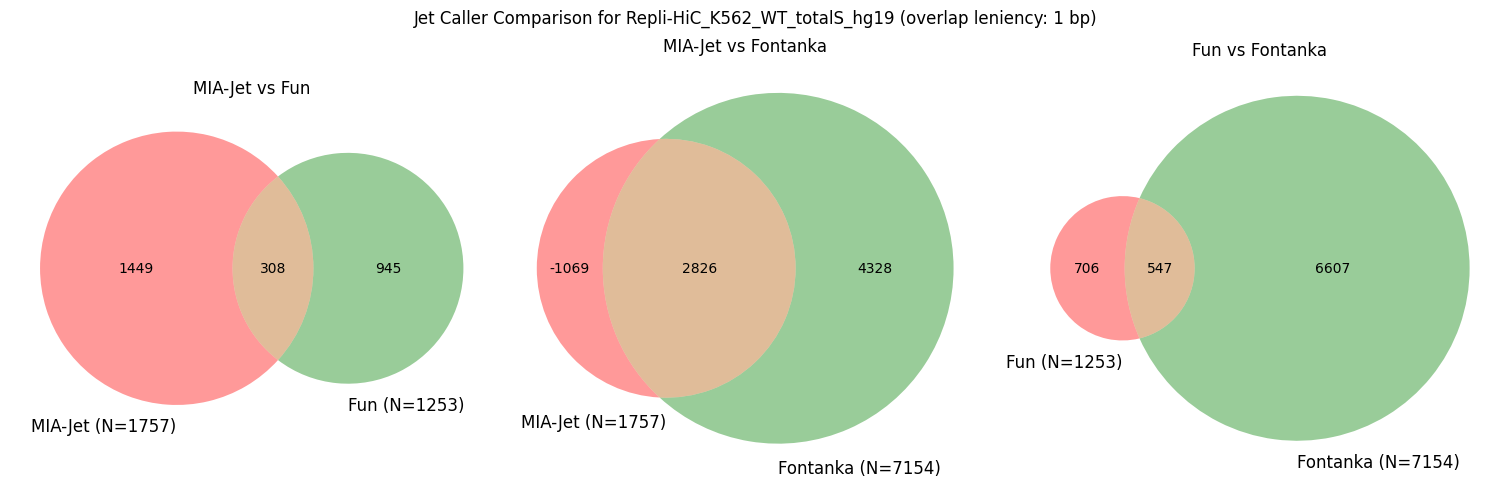

In [143]:
# every pairwise combination of table names
pairs = list(itertools.combinations(table_names, 2))

fig, axes = plt.subplots(1, len(pairs), figsize=(5 * len(pairs), 5), layout='constrained')

for ax, (A, B) in zip(axes, pairs):
    total_A = results.loc[A, A]
    total_B = results.loc[B, B]
    inter   = results.loc[A, B]  # # of A features shared with B
    
    only_A = total_A - inter
    only_B = total_B - inter

    venn2(subsets=(int(only_A), int(only_B), int(inter)), set_labels=(f"{A} (N={int(total_A)})", f"{B} (N={int(total_B)})"), ax=ax)
    ax.set_title(f"{A} vs {B}")

fig.suptitle(f"Jet Caller Comparison for {data_name} (overlap leniency: {int(window_size)} bp)")

plt.show()  
